In [12]:
import urllib
import nltk
from bs4 import BeautifulSoup
from bs4.element import Comment

import re
import urllib.request

In [3]:
user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'

url = "http://journals.sagepub.com/doi/abs/10.1177/1932296817706375?url_ver=Z39.88-2003&rfr_id=ori:rid:crossref.org&rfr_dat=cr_pub%3dpubmed"
headers={'User-Agent':user_agent,} 

request=urllib.request.Request(url,None,headers) #The assembled request
response = urllib.request.urlopen(request)
data = response.read() # The data u need
#data

In [24]:
def tag_visible(element):
    if element.parent.name in ['style', 'script', 'head', 'title', 'meta', '[document]']:
        return False
    if isinstance(element, Comment):
        return False
    return True


def text_from_html(body):
    soup = BeautifulSoup(body, 'html.parser')
    texts = soup.findAll(text=True)
    visible_texts = filter(tag_visible, texts)  
    return u" ".join(t.strip() for t in visible_texts)

html = urllib.request.urlopen('http://journals.sagepub.com/doi/abs/10.1177/1932296817706375?url_ver=Z39.88-2003&rfr_id=ori:rid:crossref.org&rfr_dat=cr_pub%3dpubmed').read()
print(text_from_html(html))

                   Skip to main content                                                                     MENU      Browse    Resources    Authors    Librarians    Editors    Societies       My Tools    My Alerts    My Saved Searches    My Favorite Journals    My Account      Advanced Search                                       Browse    Resources    Authors    Librarians    Editors    Societies       My Tools    My Alerts    My Saved Searches    My Favorite Journals    My Account      Advanced Search                             Advanced                       Sign in: | Register          SIGN IN      On your first visit to SAGE Journals please set a new password           Email     Password:     Remember me      Forgotten your password?               Set new password  Need Help?    Or    Register for an Account              Account Details    Sign Out                        Sign Out        INSTITUTIONAL ACCESS   Institution       Institutional Access      Shibboleth    Open Athens  

In [25]:
# Create a BeautifulSoup object from the HTML
soup = BeautifulSoup(html, "html5lib")
type(soup)

bs4.BeautifulSoup

In [26]:
for link in soup.findAll('a', attrs={'href': re.compile("^http://")}):
    print(link.get('href'))

http://SK.sagepub.com/video
http://sk.sagepub.com/
http://methods.sagepub.com
http://data.sagepub.com/sagestats/
http://library.cqpress.com/index.php
http://www.sagepub.com/journals.nav
http://www.uk.sagepub.com/rate-reprints.cp
http://www.sagepub.com/journalsPermissions.nav


In [6]:
# Take out the <div> of name and get its value
name_box = soup.find('h1', attrs={'class': 'diabetes'})
print(name_box)

None


In [6]:
# Get soup title
soup.title

<title>SAGE Journals: Your gateway to world-class journal research</title>

In [7]:
# Get soup title as string
soup.title.string

'SAGE Journals: Your gateway to world-class journal research'

In [8]:
# Get hyperlinks from soup and check out first several
soup.findAll('a')[:8]

[<a class="skiptocontent" href="#" id="skiptocontent" tabindex="1" title="Skip to Content">Skip to main content</a>,
 <a href="#">
 		<img alt="Menus" src="/pb-assets/Images/hamburger-menu.svg" title="Menus"/>
 	</a>,
 <a href="/">
 			<img alt="SAGE Journals" src="/pb-assets/Images/SJ-logo.svg"/>
 		</a>,
 <a href="#"><img alt="Profile" src="/pb-assets/Images/profile.svg" title="Profile"/><img alt="logged-in" class="loggedInArrow" src="/pb-assets/Images/Arrow-down-red-small.png"/></a>,
 <a href="#">
 			<img alt="Search" src="/pb-assets/Images/search.svg" title="Search"/>
 		</a>,
 <a href="/action/showPublications" id="portalBrowseLink">Browse</a>,
 <a class="expander" href="#">Resources</a>,
 <a href="/page/resources/authors">Authors</a>]

In [16]:
# Get the text out of the soup and print it
text = soup.get_text()
#print(text)

In [17]:
# tokenize using regular expression

# Import regex package
import re

# Define sentence
sentence = 'peter piper pick a peck of pickled peppers'

# Define regex
ps = 'p\w+'

# Find all words in sentence that match the regex and print them
re.findall(ps, sentence)

['peter', 'piper', 'pick', 'peck', 'pickled', 'peppers']

In [18]:
# Find all words in text  and print several
tokens = re.findall('\w+', text)
tokens[:8]

['var',
 'dataLayer',
 'dataLayer',
 'dataLayer',
 'push',
 'site',
 'environment',
 'live']

In [19]:
# tokenize using nltk

# Import RegexpTokenizer from nltk.tokenize
from nltk.tokenize import RegexpTokenizer

# Create tokenizer
tokenizer = RegexpTokenizer('\w+')

# Create tokens
tokens = tokenizer.tokenize(text)
tokens[:8]

['var',
 'dataLayer',
 'dataLayer',
 'dataLayer',
 'push',
 'site',
 'environment',
 'live']

In [20]:
#all capital letters have been made lower case

# Initialize new list
words = []

# Loop through list tokens and make lower case
for word in tokens:
    words.append(word.lower())

# Print several items from list as sanity check
words[:8]

['var',
 'datalayer',
 'datalayer',
 'datalayer',
 'push',
 'site',
 'environment',
 'live']

In [21]:
# Remove stop words

#to install the stopwords on your system    nltk.download('stopwords')

# Import nltk
import nltk

# Get English stopwords and print some of them
sw = nltk.corpus.stopwords.words('english')
sw[:5]

['i', 'me', 'my', 'myself', 'we']

In [22]:
#You want the list of all words in words that are not in sw then add the to a new list if they are not in sw

# Initialize new list
words_ns = []

# Add to words_ns all words that are in words but not in sw
for word in words:
    if word not in sw:
        words_ns.append(word)

# Print several list items as sanity check
words_ns[:5]

['var', 'datalayer', 'datalayer', 'datalayer', 'push']

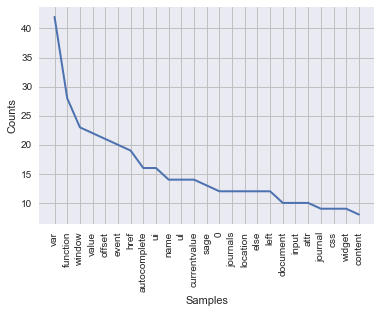

In [23]:
# most frequent words in the pebmed diabetes type 2

# create a frequency distribution object using the function     nltk.FreqDist()

#Import datavis libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Figures inline and set visualization style
%matplotlib inline
sns.set()

# Create freq dist and plot
freqdist1 = nltk.FreqDist(words_ns)
freqdist1.plot(25)

In [20]:
###### create own function

def plot_word_freq(url):
    """Takes a url (from Project Gutenberg) and plots a word frequency
    distribution"""
    # Make the request and check object type
    r = requests.get(url)
    # Extract HTML from Response object and print
    html = r.text
    # Create a BeautifulSoup object from the HTML
    soup = BeautifulSoup(html, "html5lib")
    # Get the text out of the soup and print it
    text = soup.get_text()
    # Create tokenizer
    tokenizer = RegexpTokenizer('\w+')
    # Create tokens
    tokens = tokenizer.tokenize(text)
    # Initialize new list
    words = []
    # Loop through list tokens and make lower case
    for word in tokens:
        words.append(word.lower())
    # Get English stopwords and print some of them
    sw = nltk.corpus.stopwords.words('english')
    # Initialize new list
    words_ns = []
    # Add to words_ns all words that are in words but not in sw
    for word in words:
        if word not in sw:
            words_ns.append(word)
    # Create freq dist and plot
    freqdist1 = nltk.FreqDist(words_ns)
    freqdist1.plot(25)

In [21]:
plot_word_freq('https://omim.org/entry/181500')

NameError: name 'requests' is not defined